# Import Required Libraries

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, Activation, AveragePooling3D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, MaxPooling3D,Conv3D
from tensorflow.keras.layers import Concatenate, SpatialDropout2D, SpatialDropout3D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras import initializers
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
#import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
#from tensorflow.keras.utils import plot_model
import collections
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import backend as k
import numpy as np
import pandas as pd
import scipy.ndimage as ndi
from tensorflow.keras.utils import plot_model
import sklearn.metrics as metrics
import seaborn as sns

from tensorflow.keras.applications import ResNet50,InceptionV3,VGG16,ResNet50, ResNet101,ResNet152,DenseNet121,ResNet101V2,ResNet50V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, auc
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50,ResNet101
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from imutils import paths
import numpy as np
import pickle
import random
import os

In [ ]:
t2_samples_v1 = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/tse_tra/X_train_t2_3D.npy',allow_pickle=True)
t2_tra_labels  = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/tse_tra/Y_train_t2_3D.npy',allow_pickle=True)
adc_samples_v1    = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/adc/X_train_adc_3D.npy',allow_pickle=True)
bval_samples_v1   = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/bval/X_train_bval_3D.npy',allow_pickle=True)

In [ ]:
# print(t2_samples_v1.shape)
# print(adc_samples_v1.shape)
# print(bval_samples_v1.shape)

In [ ]:
# factor = 224/t2_tra_samples.shape[2]
# print(factor)
# t2_tra_samples_v1 = ndi.zoom(t2_tra_samples, (1,1, factor, factor), order=2)
# print(t2_tra_samples_v1.shape)
      
# factor = 224/adc_samples.shape[2]
# print(factor)
# adc_samples_v1 = ndi.zoom(adc_samples, (1,1, factor, factor), order=2)
# print(adc_samples_v1.shape)
      
# factor = 224/bval_samples.shape[2]
# print(factor)
# bval_samples_v1 = ndi.zoom(bval_samples, (1,1, factor, factor), order=2)
# print(t2_tra_samples_v1.shape)

In [ ]:
t2_samples_v2    = t2_samples_v1.reshape((112,60,60,3))
adc_samples_v2   = adc_samples_v1.reshape((112,16,16,3))
bval_samples_v2  = bval_samples_v1.reshape((112,16,16,3))

# print("#####################################################")
print(t2_samples_v2.shape)
print(adc_samples_v2.shape)
print(bval_samples_v2.shape)

In [ ]:
# np.save('C:/Sapna/Graham/Capstone/data/train/generated/numpy/tse_tra/t2_samples_224.npy',t2_samples_v2)
# np.save('C:/Sapna/Graham/Capstone/data/train/generated/numpy/adc/adc_samples_224.npy',adc_samples_v2)
# np.save('C:/Sapna/Graham/Capstone/data/train/generated/numpy/bval/bval_samples_224.npy',bval_samples_v2)

In [ ]:
# t2_samples_v2    = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/tse_tra/t2_samples_224.npy',allow_pickle=True)
# t2_tra_labels    = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/tse_tra/Y_train_t2_3D.npy',allow_pickle=True)
# adc_samples_v2   = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/adc/adc_samples_224.npy',allow_pickle=True)
# bval_samples_v2  = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/bval/bval_samples_224.npy',allow_pickle=True)

In [ ]:
# t2_samples_v2    = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/tse_tra/t2_samples_v2.npy',allow_pickle=True)
# t2_tra_labels    = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/tse_tra/Y_train_t2_3D.npy',allow_pickle=True)
# adc_samples_v2   = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/adc/adc_samples_v2.npy',allow_pickle=True)
# bval_samples_v2  = np.load('C:/Sapna/Graham/Capstone/data/train/generated/numpy/bval/bval_samples_v2.npy',allow_pickle=True)

In [ ]:
target_tra = []
for i in t2_tra_labels:
    if i == 1:
        target_tra.append("0")
    elif i == 2 or i ==3:
        target_tra.append("1")
#     elif i == 3:
#         target_tra.append("2")
#     elif i == 4:
#         target_tra.append("3")
    else:
        target_tra.append("2")

print("The frequency count of the GS:")
collections.Counter(target_tra)

In [10]:
t2_labels = np.array(pd.get_dummies(target_tra))

In [11]:
t2_categorical = pd.DataFrame(t2_labels).idxmax(axis=1)
print(collections.Counter(t2_categorical))

Counter({1: 61, 0: 36, 2: 15})


# Split the train and test data

In [12]:
x_train_t2,x_test_t2,y_train_t2,y_test_t2 = train_test_split(t2_samples_v2,t2_labels,
                                                                     test_size=0.20, 
                                                                     stratify=t2_labels,  
                                                                     random_state=42)

x_train_t2,x_val_t2,y_train_t2,y_val_t2 = train_test_split(x_train_t2,y_train_t2,
                                                                     test_size=0.20, 
                                                                     stratify=y_train_t2,  
                                                                     random_state=42)

categorical_train_labels = pd.DataFrame(y_train_t2).idxmax(axis=1)
print(collections.Counter(categorical_train_labels))
categorical_val_labels = pd.DataFrame(y_val_t2).idxmax(axis=1)
print(collections.Counter(categorical_val_labels))
categorical_test_labels = pd.DataFrame(y_test_t2).idxmax(axis=1)
print(collections.Counter(categorical_test_labels))
print(x_train_t2.shape)
print(x_test_t2.shape)
print(x_val_t2.shape)

Counter({1: 38, 0: 23, 2: 10})
Counter({1: 10, 0: 6, 2: 2})
Counter({1: 13, 0: 7, 2: 3})
(71, 60, 60, 3)
(23, 60, 60, 3)
(18, 60, 60, 3)


In [13]:
x_train_adc,x_test_adc,y_train_adc,y_test_adc = train_test_split(adc_samples_v2,t2_labels,
                                                                     test_size=0.20, 
                                                                     stratify=t2_labels,  
                                                                     random_state=42)

x_train_adc,x_val_adc,y_train_adc,y_val_adc = train_test_split(x_train_adc,y_train_adc,
                                                                     test_size=0.20, 
                                                                     stratify=y_train_adc,  
                                                                     random_state=42)

categorical_train_labels = pd.DataFrame(y_train_adc).idxmax(axis=1)
print(collections.Counter(categorical_train_labels))
categorical_val_labels = pd.DataFrame(y_val_adc).idxmax(axis=1)
print(collections.Counter(categorical_val_labels))
categorical_test_labels = pd.DataFrame(y_test_adc).idxmax(axis=1)
print(collections.Counter(categorical_test_labels))
print(x_train_adc.shape)
print(x_test_adc.shape)

Counter({1: 38, 0: 23, 2: 10})
Counter({1: 10, 0: 6, 2: 2})
Counter({1: 13, 0: 7, 2: 3})
(71, 16, 16, 3)
(23, 16, 16, 3)


In [14]:
x_train_bval,x_test_bval,y_train_bval,y_test_bval = train_test_split(bval_samples_v2,t2_labels,
                                                                     test_size=0.20, 
                                                                     stratify=t2_labels,  
                                                                     random_state=42)

x_train_bval,x_val_bval,y_train_bval,y_val_bval = train_test_split(x_train_bval,y_train_bval,
                                                                     test_size=0.20, 
                                                                     stratify=y_train_bval,  
                                                                     random_state=42)

categorical_train_labels = pd.DataFrame(y_train_bval).idxmax(axis=1)
print(collections.Counter(categorical_train_labels))
categorical_val_labels = pd.DataFrame(y_val_bval).idxmax(axis=1)
print(collections.Counter(categorical_val_labels))
categorical_test_labels = pd.DataFrame(y_test_bval).idxmax(axis=1)
print(collections.Counter(categorical_test_labels))
print(x_train_bval.shape)
print(x_test_bval.shape)

Counter({1: 38, 0: 23, 2: 10})
Counter({1: 10, 0: 6, 2: 2})
Counter({1: 13, 0: 7, 2: 3})
(71, 16, 16, 3)
(23, 16, 16, 3)


In [15]:
# Data Augmentation

In [ ]:
x_train_t2_aug = x_train_t2
y_train_t2_aug = y_train_t2

for i in range(0,32):
    datagen = ImageDataGenerator(
        rotation_range = 90,
        horizontal_flip = True,
        vertical_flip = True
    )

    datagen.fit(x_train_t2_aug)

    for X_batch, y_batch in datagen.flow(x_train_t2_aug, y_train_t2_aug, batch_size=32):
        break

    x_train_t2_aug = np.append(x_train_t2_aug,X_batch,axis=0)
    y_train_t2_aug = np.append(y_train_t2_aug,y_batch,axis=0)


print("Train X1 size:",x_train_t2_aug.shape)
print("Train Y1 size:",y_train_t2_aug.shape)

In [ ]:
x_train_adc_aug = x_train_adc
y_train_adc_aug = y_train_adc

for i in range(0,32):
    datagen = ImageDataGenerator(
        rotation_range = 90,
        horizontal_flip = True,
        vertical_flip = True
    )

    datagen.fit(x_train_adc_aug)

    for X_batch, y_batch in datagen.flow(x_train_adc_aug, y_train_adc_aug, batch_size=32):
        break

    x_train_adc_aug = np.append(x_train_adc_aug,X_batch,axis=0)
    y_train_adc_aug = np.append(y_train_adc_aug,y_batch,axis=0)


print("Train X1 size:",x_train_adc_aug.shape)
print("Train Y1 size:",y_train_adc_aug.shape)

In [ ]:
x_train_bval_aug = x_train_bval
y_train_bval_aug = y_train_bval

for i in range(0,32):
    datagen = ImageDataGenerator(
        rotation_range = 90,
        horizontal_flip = True,
        vertical_flip = True
    )

    datagen.fit(x_train_bval_aug)

    for X_batch, y_batch in datagen.flow(x_train_bval_aug, y_train_bval_aug, batch_size=32):
        break

    x_train_bval_aug = np.append(x_train_bval_aug,X_batch,axis=0)
    y_train_bval_aug = np.append(y_train_bval_aug,y_batch,axis=0)


print("Train X1 size:",x_train_bval_aug.shape)
print("Train Y1 size:",y_train_bval_aug.shape)

In [17]:
factor = 299/x_train_t2.shape[2]
x_train_t2_v1 = ndi.zoom(x_train_t2,(1,factor, factor,1), order=2)
print(x_train_t2_v1.shape)

factor = 299/x_train_bval.shape[2]
x_train_bval_v1 = ndi.zoom(x_train_bval, (1,factor,factor,1), order=2)
print(x_train_bval_v1.shape)

factor = 299/x_train_adc.shape[2]
x_train_adc_v1 = ndi.zoom(x_train_adc,(1,factor, factor,1), order=2)
print(x_train_adc_v1.shape)

(71, 299, 299, 3)
(71, 299, 299, 3)
(71, 299, 299, 3)


In [19]:
factor = 299/x_val_t2.shape[2]
x_val_t2_v1 = ndi.zoom(x_val_t2,(1,factor, factor,1), order=2)
print(x_val_t2_v1.shape)
factor = 299/x_val_adc.shape[2]
x_val_adc_v1 = ndi.zoom(x_val_adc,(1,factor, factor,1), order=2)
print(x_val_adc_v1.shape)
factor = 299/x_val_bval.shape[2]
x_val_bval_v1 = ndi.zoom(x_val_bval,(1,factor, factor,1), order=2)
print(x_val_bval.shape)

(18, 299, 299, 3)
(18, 299, 299, 3)
(18, 16, 16, 3)


In [20]:
factor = 299/x_test_t2.shape[2]
x_test_t2_v1 = ndi.zoom(x_test_t2,(1,factor, factor,1), order=2)
print(x_test_t2_v1.shape)
factor = 299/x_test_adc.shape[2]
x_test_adc_v1 = ndi.zoom(x_test_adc,(1,factor, factor,1), order=2)
print(x_test_adc_v1.shape)
factor = 299/x_test_bval.shape[2]
x_test_bval_v1 = ndi.zoom(x_test_bval,(1,factor, factor,1), order=2)
print(x_test_bval.shape)

(23, 299, 299, 3)
(23, 299, 299, 3)
(23, 16, 16, 3)


In [21]:
# base_model = ResNet152(weights="imagenet", include_top=False)

# base_model = VGG16(include_top=False,weights="imagenet")
# base_model = ResNet101(weights="imagenet", include_top=False)
# base_model = ResNet50(weights="imagenet", include_top=False)
# base_model = ResNet152(weights="imagenet", include_top=False)

# base_model = ResNet50V2(weights="imagenet", include_top=False)
# base_model = ResNet101V2(weights="imagenet", include_top=False)

# base_model = DenseNet121(weights="imagenet", include_top=False)

base_model = InceptionV3(include_top=False)
# base_model.summary()
# model = Model(inputs=base_model.input, outputs=base_model.get_layer('batch_normalization_938').output)

In [22]:
# x_train_t2    = x_train_t2_aug_v1/255.
# x_train_adc   = x_train_adc_aug_v1/255.
# x_train_bval  = x_train_bval_aug_v1/255.

x_train_t2    = x_train_t2_v1/255.
x_train_adc   = x_train_adc_v1/255.
x_train_bval  = x_train_bval_v1/255.

x_val_t2      = x_val_t2_v1/255.
x_val_adc     = x_val_adc_v1/255.
x_val_bval    = x_val_bval_v1/255.

x_test_t2     = x_test_t2_v1/255.
x_test_adc    = x_test_adc_v1/255.
x_test_bval   = x_test_bval_v1/255.

In [25]:
m=8
n=8
p=2048

print(x_train_t2.shape)
print(x_train_adc.shape)
print(x_train_bval.shape)

(71, 299, 299, 3)
(71, 299, 299, 3)
(71, 299, 299, 3)


In [26]:
train_features_t2   = base_model.predict(x_train_t2)
# print(train_features_t2.shape)
x_train_features_t2 = train_features_t2.reshape((train_features_t2.shape[0], m * n * p))

train_features_adc   = base_model.predict(x_train_adc)
x_train_features_adc = train_features_adc.reshape((train_features_adc.shape[0], m * n * p))

train_features_bval = base_model.predict(x_train_bval)
x_train_features_bval = train_features_bval.reshape((train_features_bval.shape[0], m * n * p))

print(x_train_features_t2.shape)
print(x_train_features_adc.shape)
print(x_train_features_bval.shape)

(71, 131072)
(71, 131072)
(71, 131072)


In [71]:
train_data = np.append(x_train_features_t2,x_train_features_adc,axis=1)
train_data_v1 = np.append(train_data,x_train_features_bval,axis=1)
train_data_v1.shape

(71, 393216)

In [28]:
test_features_t2   = base_model.predict(x_test_t2)
x_test_features_t2 = test_features_t2.reshape((test_features_t2.shape[0], m * n * p))

test_features_adc   = base_model.predict(x_test_adc)
x_test_features_adc = test_features_adc.reshape((test_features_adc.shape[0], m * n * p))

test_features_bval = base_model.predict(x_test_bval)
x_test_features_bval = test_features_bval.reshape((test_features_bval.shape[0], m * n * p))

print(x_test_features_t2.shape)
print(x_test_features_adc.shape)
print(x_test_features_bval.shape)

(23, 131072)
(23, 131072)
(23, 131072)


In [72]:
test_data = np.append(x_test_features_t2,x_test_features_adc,axis=1)
test_data_v1 = np.append(test_data,x_test_features_bval,axis=1)
test_data_v1.shape

(23, 393216)

In [31]:
val_features_t2   = base_model.predict(x_val_t2, batch_size=32)
x_val_features_t2 = val_features_t2.reshape((val_features_t2.shape[0], m * n * p))

# train_batchImages_adc = np.vstack([x_train_adc])
val_features_adc   = base_model.predict(x_val_adc, batch_size=32)
x_val_features_adc = val_features_adc.reshape((val_features_adc.shape[0], m * n * p))

# # train_batchImages_bval = np.vstack([x_train_bval])
val_features_bval = base_model.predict(x_val_bval, batch_size=32)
x_val_features_bval = val_features_bval.reshape((val_features_bval.shape[0], m * n * p))

print(x_val_features_t2.shape)
print(x_val_features_adc.shape)
print(x_val_features_bval.shape)

(18, 131072)
(18, 131072)
(18, 131072)


In [73]:
val_data = np.append(x_val_features_t2,x_val_features_adc,axis=1)
val_data_v1 = np.append(val_data,x_val_features_bval,axis=1)
val_data_v1.shape

(18, 393216)

In [74]:
categorical_train_labels = pd.DataFrame(y_train_t2).idxmax(axis=1)
print(collections.Counter(categorical_train_labels))
categorical_val_labels = pd.DataFrame(y_val_t2).idxmax(axis=1)
print(collections.Counter(categorical_val_labels))
categorical_test_labels = pd.DataFrame(y_test_t2).idxmax(axis=1)
print(collections.Counter(categorical_test_labels))

Counter({1: 38, 0: 23, 2: 10})
Counter({1: 10, 0: 6, 2: 2})
Counter({1: 13, 0: 7, 2: 3})


In [75]:
# y_train = np.vstack([y_train_t2,y_train_adc,y_train_bval])
# y_val   = np.vstack([y_val_t2,y_val_adc,y_val_bval])
# y_test  = np.vstack([y_test_t2,y_test_adc,y_test_bval])

y_train = y_train_t2
y_val   = y_val_t2
y_test  = y_test_t2

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

print(train_data_v1.shape)
print(val_data_v1.shape)
print(test_data_v1.shape)

(71, 3)
(18, 3)
(23, 3)
(71, 393216)
(18, 393216)
(23, 393216)


In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_t2_v1 = sc.fit_transform(train_data_v1)
x_val_t2_v1   = sc.transform(val_data_v1)
x_test_t2_v1  = sc.transform(test_data_v1)

In [77]:
y_train_t2_v1  = y_train
y_val_t2_v1    = y_val
y_test_t2_v1   = y_test

In [78]:
from sklearn.decomposition import PCA
pca = PCA(.95)
principalComponents_train = pca.fit_transform(x_train_t2_v1)
principalComponents_val   = pca.transform(x_val_t2_v1)
principalComponents_test  = pca.transform(x_test_t2_v1)

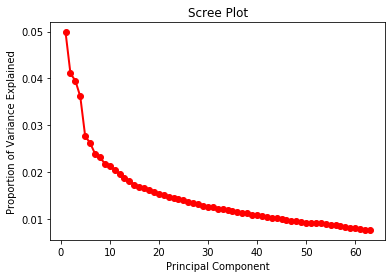

In [79]:
pca.explained_variance_ratio_
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [80]:
print("Train",principalComponents_train.shape)
print("Val",principalComponents_val.shape)
print("Test",principalComponents_test.shape)

Train (71, 63)
Val (18, 63)
Test (23, 63)


In [81]:
t2_categorical = pd.DataFrame(y_train_t2_v1).idxmax(axis=1)
print(collections.Counter(t2_categorical))
print(t2_categorical.shape)

Counter({1: 38, 0: 23, 2: 10})
(71,)


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from logitboost import LogitBoost
from sklearn.ensemble import AdaBoostClassifier

In [84]:
param_grid = {'n_estimators':[50,100,150,200,250,350],
             'min_samples_split':[0.01,0.05,0.1],
             'max_depth':[5,10,15],
             'max_features' :['auto', 'sqrt', 'log2'],
             'bootstrap' : [False,True],
             'random_state':[42]}
model = RandomForestClassifier()
rf_grid = GridSearchCV(model,param_grid,cv =5,refit=True,n_jobs=-1,verbose=5)
rf_grid.fit(principalComponents_train, y_train_t2_v1)

In [ ]:
grid_model = rf_grid.best_estimator_
grid_model

In [ ]:
# model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='entropy', max_depth=5, max_features='log2',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=0.05,
#                        min_weight_fraction_leaf=0.0, n_estimators=210,
#                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
#                        warm_start=False)

In [85]:
model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.02,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
model.fit(principalComponents_train, y_train_t2_v1)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.02,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [86]:
t2_categorical = pd.DataFrame(y_train_t2_v1).idxmax(axis=1)
print(collections.Counter(t2_categorical))

Counter({1: 38, 0: 23, 2: 10})


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42,learning_rate=0.1)
ada.fit(principalComponents_train, t2_categorical)

In [63]:
from logitboost import LogitBoost
from sklearn.tree import DecisionTreeRegressor
lboost = LogitBoost(DecisionTreeRegressor(max_depth=3),n_estimators=50, random_state=42,
                    weight_trim_quantile=0.05, 
                    max_response=4.0, learning_rate=0.1, bootstrap=False)
lboost.fit(principalComponents_train, t2_categorical)

LogitBoost(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                                max_depth=3, max_features=None,
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                presort='deprecated',
                                                random_state=None,
                                                splitter='best'),
           bootstrap=False, learning_rate=0.1, max_response=4.0,
           n_estimators=50, random_state=42, weight_trim_quantile=0.05)

In [87]:
#Train 
predicted_train = lboost.predict(principalComponents_train)
predicted_train_pd = pd.DataFrame(predicted_train)

predicted_train_pd['Max'] = predicted_train_pd.idxmax(axis=1)
# print(predicted_train_pd)

actual_train = pd.DataFrame(y_train_t2_v1).idxmax(axis=1)
# print(collections.Counter(actual_train))

In [88]:
#Test 
predicted_val = lboost.predict(principalComponents_val)
predicted_val_pd = pd.DataFrame(predicted_val)

predicted_val_pd['Max'] = predicted_val_pd.idxmax(axis=1)
# print(predicted_val_pd)

actual_val = pd.DataFrame(y_val_t2_v1).idxmax(axis=1)
# print(collections.Counter(actual_val))

In [89]:
from sklearn.metrics import cohen_kappa_score,accuracy_score
print("Train Accuracy", accuracy_score(actual_train,predicted_train_pd['Max']))
print("Test Accuracy", accuracy_score(actual_val,predicted_val_pd['Max']))
# print("Hold-out Accuracy", accuracy_score(actual_test,predicted_test_pd['Max']))

Train Accuracy 0.323943661971831
Test Accuracy 0.3333333333333333


In [90]:
print("Train Report",metrics.classification_report(actual_train, predicted_train_pd["Max"], labels=[0,1,2,3,4]))

Train Report               precision    recall  f1-score   support

           0       0.32      1.00      0.49        23
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.32      0.32      0.32        71
   macro avg       0.06      0.20      0.10        71
weighted avg       0.10      0.32      0.16        71



C:\Users\dhavy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhavy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
print("Test Report",metrics.classification_report(actual_val, predicted_val_pd["Max"], labels=[0,1,2,3,4]))

Test Report               precision    recall  f1-score   support

           0       0.33      1.00      0.50         6
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.33      0.33      0.33        18
   macro avg       0.07      0.20      0.10        18
weighted avg       0.11      0.33      0.17        18



In [69]:
# # Train Confusion Matrix
# cm = metrics.confusion_matrix(y_true=actual_train, y_pred=predicted_train_pd["Max"])
# plt.figure(figsize=(9,9)) 
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
# plt.ylabel('Actual label') 
# plt.xlabel('Predicted label')

In [70]:
# # Test Confusion Matrix
# cm = metrics.confusion_matrix(y_true=actual_val, y_pred=predicted_val_pd["Max"])
# plt.figure(figsize=(9,9)) 
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
# plt.ylabel('Actual label') 
# plt.xlabel('Predicted label')

# UN - SEEN DATA

In [ ]:
# Hold - out
predicted_test = model.predict(principalComponents_test)
predicted_test_pd = pd.DataFrame(predicted_test)

predicted_test_pd['Max'] = predicted_test_pd.idxmax(axis=1)
# predicted_test_pd

actual_test = pd.DataFrame(y_test_t2_v1).idxmax(axis=1)
print(collections.Counter(actual_test))

In [ ]:
# #Hold-out Confusion Matrix
cm = metrics.confusion_matrix(y_true=actual_test, y_pred=predicted_test_pd["Max"])
plt.figure(figsize=(9,9)) 
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [ ]:
# print("Test Report",metrics.classification_report(actual_test, predicted_test_pd["Max"], labels=[0,1,2]))